In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spotify_songs.csv to spotify_songs.csv


In [27]:
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [29]:
print(df.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [30]:
df.dropna(inplace=True)
print(df.isnull().sum())

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [31]:
df = df.drop_duplicates(subset='track_id')
df.reset_index(drop=True, inplace=True)

print(df.shape)

(28352, 23)


In [33]:
print(df.describe())

       track_popularity  danceability        energy           key  \
count      28352.000000  28352.000000  28352.000000  28352.000000   
mean          39.335320      0.653375      0.698373      5.367417   
std           23.699443      0.145791      0.183508      3.613743   
min            0.000000      0.000000      0.000175      0.000000   
25%           21.000000      0.561000      0.579000      2.000000   
50%           42.000000      0.670000      0.722000      6.000000   
75%           58.000000      0.760000      0.843000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28352.000000  28352.000000  28352.000000  28352.000000   
mean      -6.817777      0.565533      0.107939      0.177192   
std        3.036433      0.495696      0.102547      0.222814   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.310250      0.000000      0.041000      

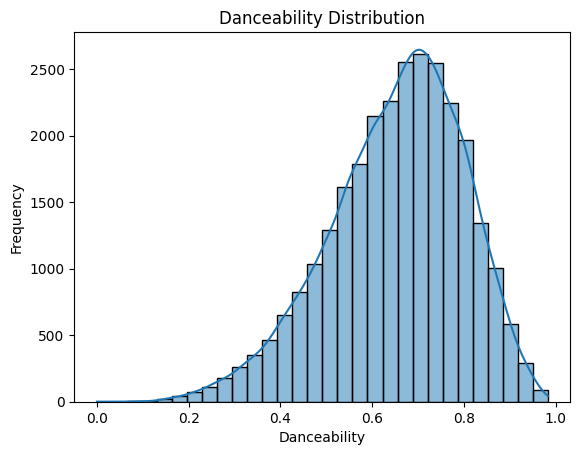

In [34]:
sns.histplot(df['danceability'], bins=30, kde=True)
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

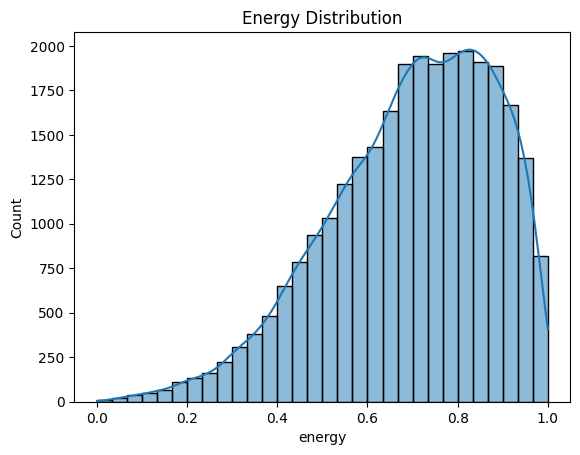

In [35]:
sns.histplot(df['energy'], bins=30, kde=True)
plt.title('Energy Distribution')
plt.show()

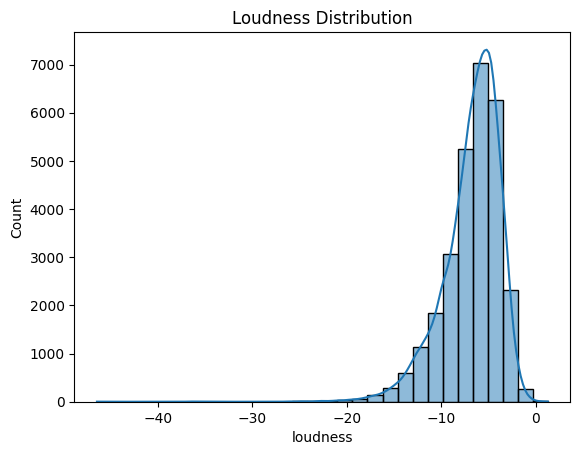

In [36]:
sns.histplot(df['loudness'], bins=30, kde=True)
plt.title('Loudness Distribution')
plt.show()

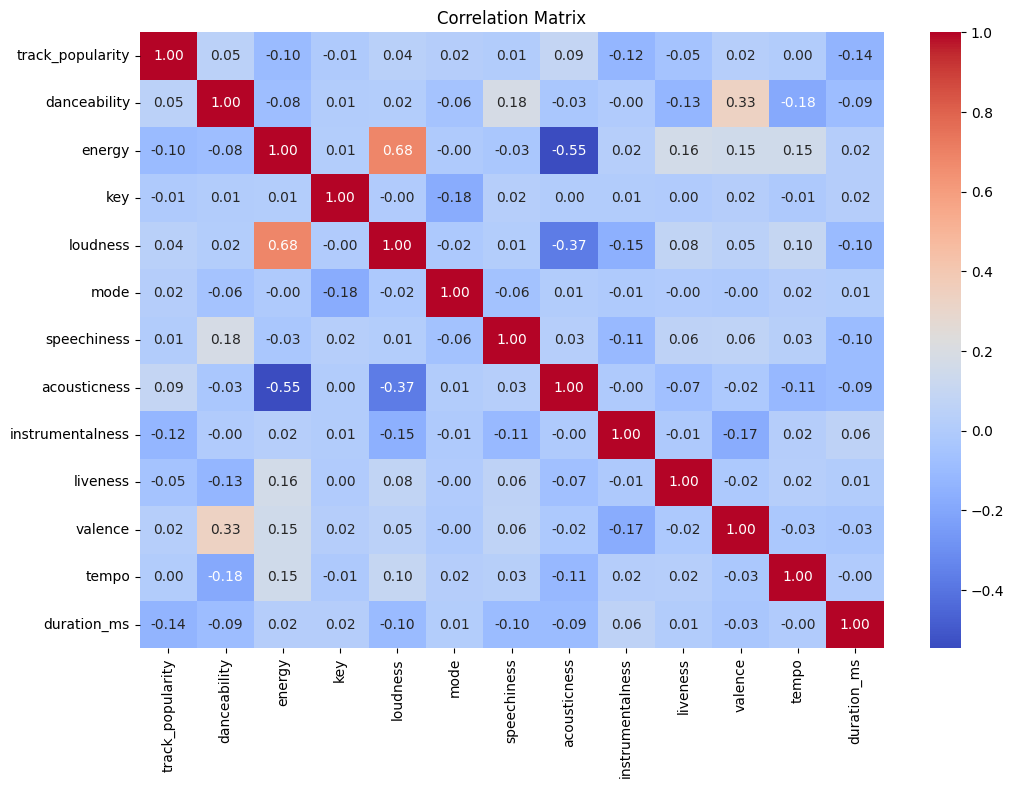

In [38]:
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

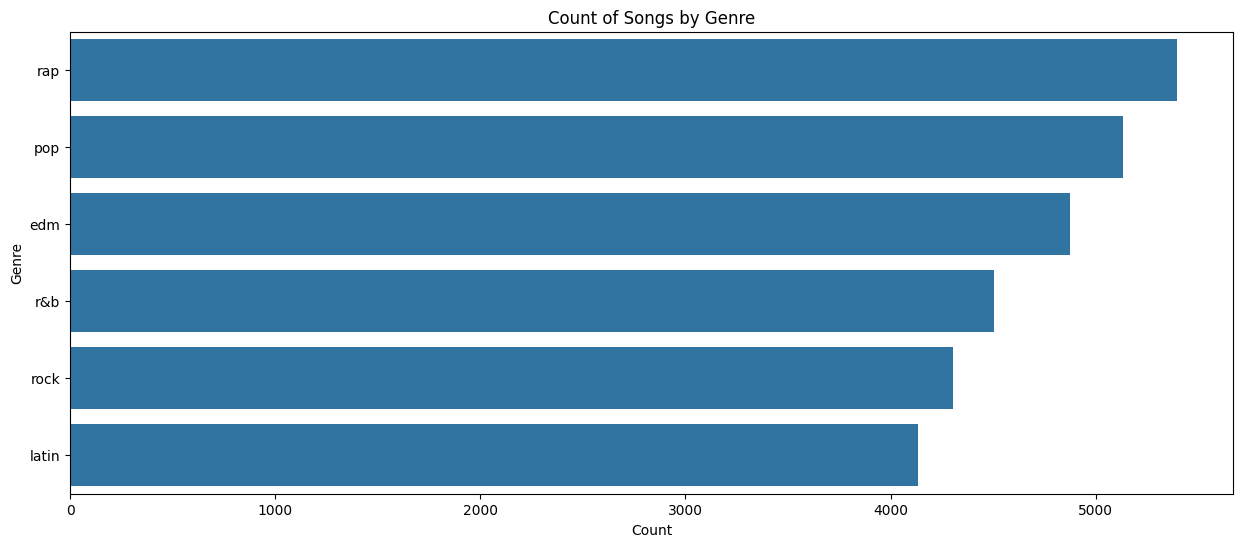

In [39]:
plt.figure(figsize=(15, 6))
sns.countplot(y='playlist_genre', data=df, order=df['playlist_genre'].value_counts().index)
plt.title('Count of Songs by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [40]:
fig = px.pie(df, names='playlist_genre')
fig.show()

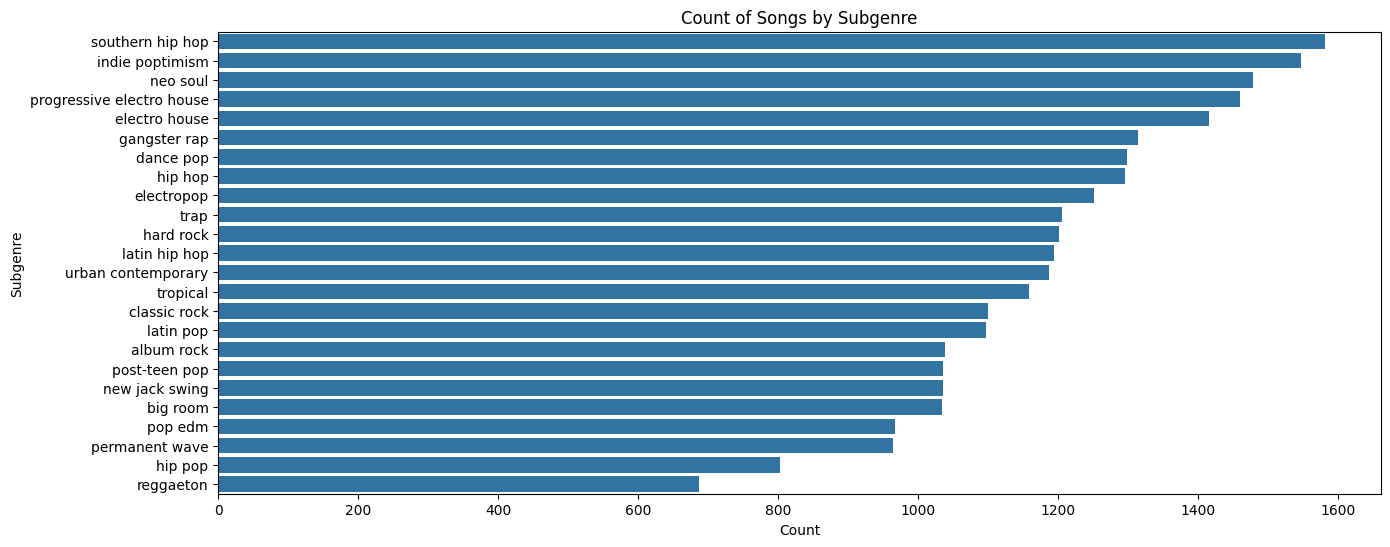

In [41]:
plt.figure(figsize=(15, 6))
sns.countplot(y='playlist_subgenre', data=df, order=df['playlist_subgenre'].value_counts().index)
plt.title('Count of Songs by Subgenre')
plt.xlabel('Count')
plt.ylabel('Subgenre')
plt.show()

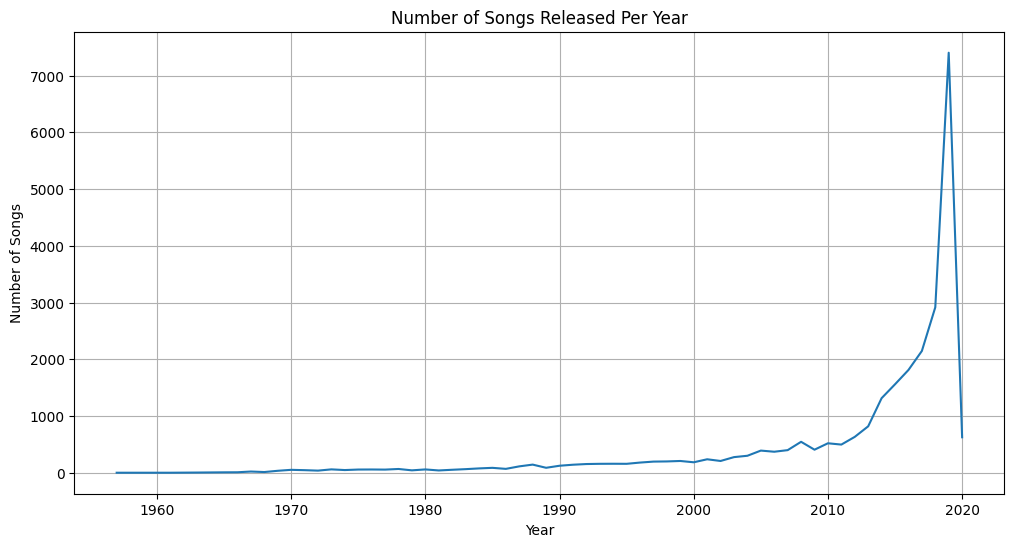

In [42]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', format='%Y-%m-%d')
songs_per_year = df.groupby(df['track_album_release_date'].dt.year).size()

plt.figure(figsize=(12, 6))
songs_per_year.plot(kind='line')
plt.title('Number of Songs Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid()
plt.show()

In [43]:
top_25_songs = df.sort_values(by='track_popularity', ascending=False).head(25)
top_25_songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1504,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.5130,98.027,209438
18027,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.4570,116.735,163636
716,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.3450,171.017,201573
1299,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,215280
687,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.5740,101.085,200960
5133,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.6420,116.971,196653
711,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.5750,91.019,189486
2941,4TnjEaWOeW0eKTKIEvJyCa,Falling,Trevor Daniel,97,1Czfd5tEby3DbdYNdqzrCa,Falling,2018-10-05,Electropop,2Z5cPJ6Z4EVZAfF08amjvL,pop,...,10,-8.756,0,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,159382
689,3ZCTVFBt2Brf31RLEnCkWJ,everything i wanted,Billie Eilish,97,4i3rAwPw7Ln2YrKDusaWyT,everything i wanted,2019-11-13,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,6,-14.454,0,0.0994,0.90200,0.657000,0.1060,0.2430,120.006,245426
1300,6WrI0LAC5M1Rw2MnX2ZvEg,Don't Start Now,Dua Lipa,97,0ix3XtPV1LwmZADsprKxcp,Don't Start Now,2019-10-31,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,11,-4.521,0,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,183290


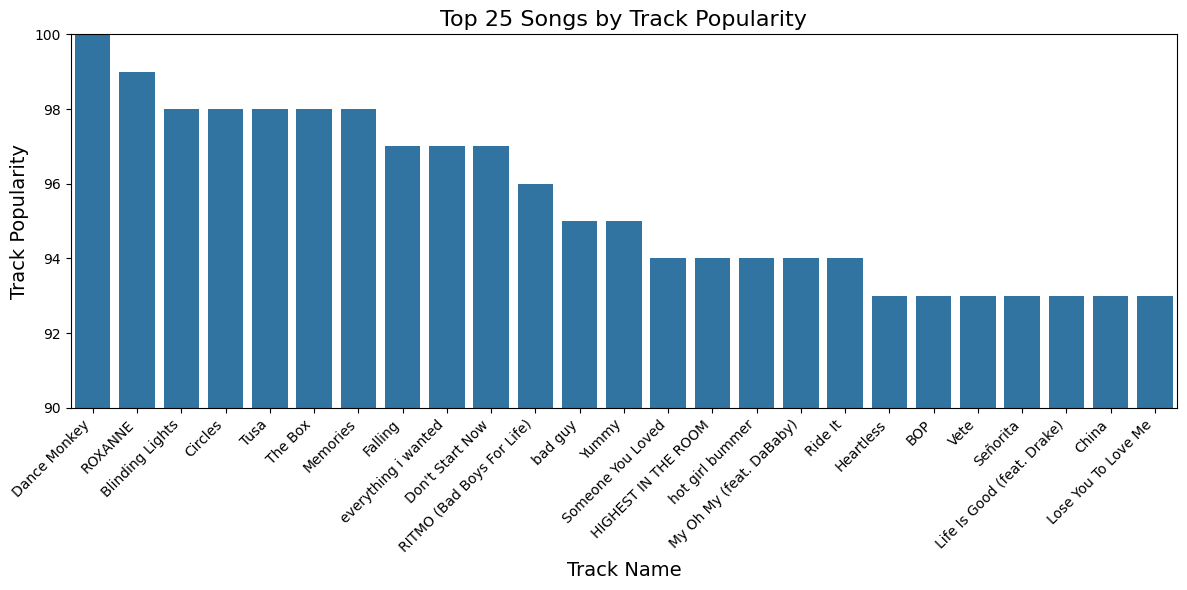

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='track_name', y='track_popularity', data=top_25_songs)
plt.title('Top 25 Songs by Track Popularity', fontsize=16)
plt.xlabel('Track Name', fontsize=14)
plt.ylabel('Track Popularity', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(90, 100)
plt.tight_layout()
plt.show()

In [48]:
artists = df.groupby('track_artist').mean(numeric_only=True).reset_index()
artists.sort_values(by='track_popularity', ascending=False).head()

,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
9735,Trevor Daniel,97.000000,0.784000,0.430000,10.000000,-8.7560,0.000000,0.03640,0.123000,0.000000,0.088700,0.236000,127.087000,159382.000000
10242,Y2K,91.000000,0.843000,0.391000,2.000000,-7.8990,1.000000,0.08450,0.181000,0.000000,0.137000,0.496000,129.972000,160627.000000
2601,Don Toliver,87.500000,0.703000,0.701500,4.000000,-4.7755,0.500000,0.10500,0.405500,0.000431,0.172000,0.511500,137.997500,155441.500000
5040,Kina,85.500000,0.510000,0.181500,2.500000,-17.6290,0.500000,0.11185,0.807000,0.013000,0.119050,0.106750,114.451500,183506.000000
4196,JACKBOYS,84.333333,0.751667,0.622333,5.666667,-5.1110,0.666667,0.29000,0.072133,0.000000,0.237333,0.449667,135.452667,194539.333333


In [57]:
artist_counts = df['track_artist'].value_counts()
df_filtered = df[df['track_artist'].isin(artist_counts[artist_counts >= 3].index)]
artists = df_filtered.groupby('track_artist').mean(numeric_only=True).reset_index()
artists = artists.sort_values(by='track_popularity', ascending=False)
artists.head(10)

,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
976,JACKBOYS,84.333333,0.751667,0.622333,5.666667,-5.111000,0.666667,0.290000,0.072133,0.000000e+00,0.237333,0.449667,135.452667,194539.333333
511,DaBaby,83.666667,0.815167,0.694500,4.666667,-4.863500,0.500000,0.300150,0.081400,9.733333e-07,0.174267,0.678833,126.167167,140231.500000
1857,Roddy Ricch,83.428571,0.851429,0.534714,6.571429,-8.145857,0.285714,0.186157,0.096143,6.028571e-05,0.321657,0.450286,118.289429,191883.000000
900,Harry Styles,81.777778,0.586333,0.634667,3.777778,-5.059444,0.777778,0.037222,0.216452,2.785556e-04,0.186889,0.401244,105.226222,214682.888889
2391,YNW Melly,81.571429,0.787286,0.539429,4.000000,-8.019000,0.428571,0.192257,0.180200,4.371429e-07,0.100829,0.538857,130.668857,225707.142857
350,Camilo,80.250000,0.725750,0.669000,4.000000,-4.328000,0.500000,0.069850,0.344425,1.767500e-06,0.107225,0.792000,114.261500,175641.000000
1262,Lil Tjay,79.666667,0.750667,0.516333,6.333333,-9.663667,0.333333,0.218333,0.345333,0.000000e+00,0.083033,0.552000,114.047333,236470.333333
1600,Nimo,77.000000,0.700333,0.717000,5.333333,-5.508667,0.333333,0.121733,0.262000,2.902967e-04,0.206000,0.519333,147.363000,205933.000000
242,Billie Eilish,76.961538,0.645462,0.315965,5.153846,-12.585923,0.500000,0.163596,0.618125,1.142079e-01,0.135608,0.272904,119.028423,198998.115385
1245,Lewis Capaldi,76.888889,0.599111,0.587333,3.888889,-5.599556,1.000000,0.046422,0.499922,0.000000e+00,0.163056,0.378222,112.690556,197153.777778


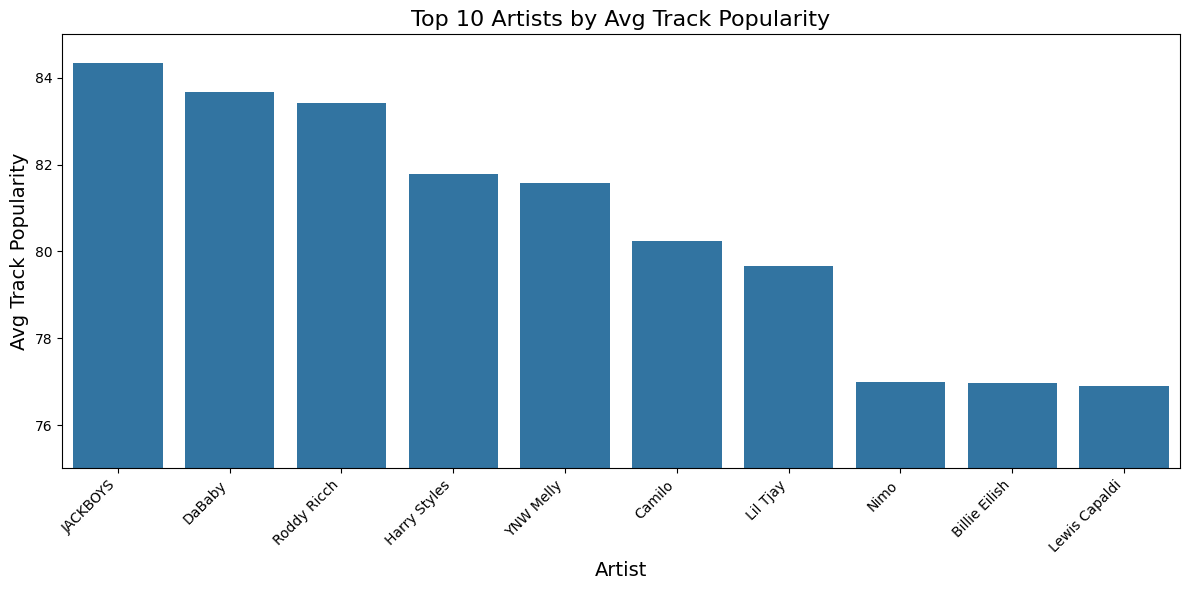

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(x='track_artist', y='track_popularity', data=artists.head(10))
plt.title('Top 10 Artists by Avg Track Popularity', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Avg Track Popularity', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(75, 85)
plt.tight_layout()
plt.show()

In [70]:
import json
from IPython.display import HTML

top100_df = df.sort_values(by='track_popularity', ascending=False).head(100)
boxplot_df = top100_df[['track_name', 'danceability', 'energy']]
data_json = boxplot_df.to_json(orient='records')

print(data_json)

[{"track_name":"Dance Monkey","danceability":0.824,"energy":0.588},{"track_name":"ROXANNE","danceability":0.621,"energy":0.601},{"track_name":"Blinding Lights","danceability":0.513,"energy":0.796},{"track_name":"Circles","danceability":0.695,"energy":0.762},{"track_name":"Tusa","danceability":0.803,"energy":0.715},{"track_name":"The Box","danceability":0.896,"energy":0.586},{"track_name":"Memories","danceability":0.764,"energy":0.32},{"track_name":"Falling","danceability":0.784,"energy":0.43},{"track_name":"everything i wanted","danceability":0.704,"energy":0.225},{"track_name":"Don't Start Now","danceability":0.794,"energy":0.793},{"track_name":"RITMO (Bad Boys For Life)","danceability":0.721,"energy":0.716},{"track_name":"bad guy","danceability":0.701,"energy":0.425},{"track_name":"Yummy","danceability":0.662,"energy":0.519},{"track_name":"Someone You Loved","danceability":0.501,"energy":0.405},{"track_name":"HIGHEST IN THE ROOM","danceability":0.598,"energy":0.427},{"track_name":"ho

In [75]:
HTML(f'''
<div id="scatter-plot"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>
  // Data from Python (inserted dynamically)
  const data = {data_json};

  const width = 800, height = 400;
  const margin = {{ top: 50, right: 20, bottom: 60, left: 70 }};

  // Scales for x and y axes
  const x = d3.scaleLinear().domain([0, 1]).range([margin.left, width - margin.right]);
  const y = d3.scaleLinear().domain([0, 1]).range([height - margin.bottom, margin.top]);

  const svg = d3.select("#scatter-plot")
    .append("svg")
    .attr("width", width)
    .attr("height", height);

  // X-axis
  svg.append("g")
    .attr("transform", `translate(0,${{height - margin.bottom}})`)
    .call(d3.axisBottom(x))
    .selectAll("text")
    .attr("fill", "white");

  // Y-axis
  svg.append("g")
    .attr("transform", `translate(${{margin.left}},0)`)
    .call(d3.axisLeft(y))
    .selectAll("text")
    .attr("fill", "white");

  // X-axis label
  svg.append("text")
    .attr("x", width / 2)
    .attr("y", height - 20)
    .attr("text-anchor", "middle")
    .style("font-size", "16px")
    .attr("fill", "#1f77b4")
    .text("Danceability");

  // Y-axis label
  svg.append("text")
    .attr("transform", "rotate(-90)")
    .attr("x", -height / 2)
    .attr("y", 20)
    .attr("text-anchor", "middle")
    .style("font-size", "16px")
    .attr("fill", "#1f77b4")
    .text("Energy");

  // Chart title
  svg.append("text")
    .attr("x", width / 2)
    .attr("y", margin.top / 2)
    .attr("text-anchor", "middle")
    .style("font-size", "20px")
    .style("font-weight", "bold")
    .attr("fill", "#1f77b4")
    .text("Spotify Songs: Danceability vs. Energy");

  // Brush for selection
  const brush = d3.brush()
    .extent([[0, 0], [width, height]])
    .on("start brush end", brushed);

  svg.append("g")
    .attr("class", "brush")
    .call(brush);

  // Scatter plot points
  svg.append("g")
    .selectAll("circle")
    .data(data)
    .enter().append("circle")
    .attr("cx", d => x(d.danceability))
    .attr("cy", d => y(d.energy))
    .attr("r", 5)
    .attr("fill", "#1f77b4")
    .append("title")
    .text(d => d.track_name);

  // Brushing function
  function brushed(event) {{
    const selection = event.selection;
    svg.selectAll("circle").classed("selected", d =>
      selection && x(d.danceability) >= selection[0][0] && x(d.danceability) <= selection[1][0] &&
      y(d.energy) >= selection[0][1] && y(d.energy) <= selection[1][1]
    );
  }}
</script>
''')

In [76]:
boxplot_df2 = top100_df[['track_name', 'speechiness', 'track_popularity']]
data_json2 = boxplot_df2.to_json(orient='records')

print(data_json2)

[{"track_name":"Dance Monkey","speechiness":0.0924,"track_popularity":100},{"track_name":"ROXANNE","speechiness":0.148,"track_popularity":99},{"track_name":"Blinding Lights","speechiness":0.0629,"track_popularity":98},{"track_name":"Circles","speechiness":0.0395,"track_popularity":98},{"track_name":"Tusa","speechiness":0.298,"track_popularity":98},{"track_name":"The Box","speechiness":0.0559,"track_popularity":98},{"track_name":"Memories","speechiness":0.0546,"track_popularity":98},{"track_name":"Falling","speechiness":0.0364,"track_popularity":97},{"track_name":"everything i wanted","speechiness":0.0994,"track_popularity":97},{"track_name":"Don't Start Now","speechiness":0.0842,"track_popularity":97},{"track_name":"RITMO (Bad Boys For Life)","speechiness":0.0657,"track_popularity":96},{"track_name":"bad guy","speechiness":0.375,"track_popularity":95},{"track_name":"Yummy","speechiness":0.106,"track_popularity":95},{"track_name":"Someone You Loved","speechiness":0.0319,"track_popularit

In [94]:
HTML(f'''
<div id="scatter-plot"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>
  // Data from Python (inserted dynamically)
  const data = {data_json2};

  const width = 800, height = 400;
  const margin = {{ top: 50, right: 20, bottom: 60, left: 70 }};

  // Calculate the min and max values for speechiness and track_popularity
  const speechinessExtent = d3.extent(data, d => d.speechiness);
  const popularityExtent = d3.extent(data, d => d.track_popularity);

  // Scales for x and y axes based on data range
  const x = d3.scaleLinear().domain(speechinessExtent).range([margin.left, width - margin.right]);
  const y = d3.scaleLinear().domain(popularityExtent).range([height - margin.bottom, margin.top]);

  const svg = d3.select("#scatter-plot")
    .append("svg")
    .attr("width", width)
    .attr("height", height);

  // X-axis
  svg.append("g")
    .attr("transform", `translate(0,${{height - margin.bottom}})`)
    .call(d3.axisBottom(x))
    .selectAll("text")
    .attr("fill", "white");

  // Y-axis
  svg.append("g")
    .attr("transform", `translate(${{margin.left}},0)`)
    .call(d3.axisLeft(y))
    .selectAll("text")
    .attr("fill", "white");

  // X-axis label
  svg.append("text")
    .attr("x", width / 2)
    .attr("y", height - 20)
    .attr("text-anchor", "middle")
    .style("font-size", "16px")
    .attr("fill", "white")
    .text("Speechiness");

  // Y-axis label
  svg.append("text")
    .attr("transform", "rotate(-90)")
    .attr("x", -height / 2)
    .attr("y", 20)
    .attr("text-anchor", "middle")
    .style("font-size", "16px")
    .attr("fill", "white")
    .text("Popularity");

  // Chart title
  svg.append("text")
    .attr("x", width / 2)
    .attr("y", margin.top / 2)
    .attr("text-anchor", "middle")
    .style("font-size", "20px")
    .style("font-weight", "bold")
    .attr("fill", "white")
    .text("Spotify Songs: Speechiness vs. Popularity");

  // Brush for selection
  const brush = d3.brush()
    .extent([[0, 0], [width, height]])
    .on("start brush end", brushed);

  svg.append("g")
    .attr("class", "brush")
    .call(brush);

  // Scatter plot points
  svg.append("g")
    .selectAll("circle")
    .data(data)
    .enter().append("circle")
    .attr("cx", d => x(d.speechiness))
    .attr("cy", d => y(d.track_popularity))
    .attr("r", 5)
    .attr("fill", "#1f77b4")
    .append("title")
    .text(d => d.track_name);

  // Brushing function
  function brushed(event) {{
    const selection = event.selection;
    svg.selectAll("circle").classed("selected", d =>
      selection && x(d.speechiness) >= selection[0][0] && x(d.speechiness) <= selection[1][0] &&
      y(d.track_popularity) >= selection[0][1] && y(d.track_popularity) <= selection[1][1]
    );
  }}
</script>
''')